# Plot quasar bias models compared to data points

In [1]:
%pylab inline
# set the size of figures below
pylab.rcParams['figure.figsize'] = (10, 4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
#Open data file (test file with few quasars)
hdulist = fits.open('../example_data/raw_colore/N1000_out_srcs_s0_15.fits')
hdulist.info()

Filename: ../example_data/raw_colore/N1000_out_srcs_s0_15.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       6   ()      
  1  CATALOG     BinTableHDU     24   1000R x 5C   [1J, 1E, 1E, 1E, 1E]   
  2  DENSITY SKEWERS  ImageHDU         8   (2048, 1000)   float32   
  3  VELOCITY SKEWERS  ImageHDU         8   (2048, 1000)   float32   
  4  BACKGROUND COSMOLOGY  BinTableHDU     21   2048R x 4C   [1E, 1E, 1E, 1E]   


In [4]:
# get growth factor in each redshift
cosmo = hdulist[4].data
ds=cosmo['D']
zs=cosmo['Z']

In [5]:
# fitting function used in Gontcho a Gontcho et al. (2018), not sure where it comes from
zr=2.39
gamma=1.71
br=3.91
bq=br*((1+zs)/(1+zr))**gamma

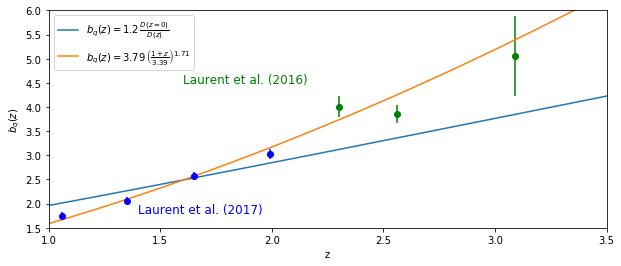

In [6]:
plt.plot(zs,1.2/ds,label=r'$b_q(z)=1.2 \, \frac{D(z=0)}{D(z)}$')
plt.plot(zs,bq,label=r'$b_q(z) = 3.79 \, \left( \frac{1+z}{3.39}\right)^{1.71}$')
plt.xlim(1.0,3.5)
plt.ylim(1.5,6.0)
plt.xlabel('z')
plt.ylabel(r'$b_q(z)$')

plt.errorbar(1.06,1.75,yerr=0.08,color='blue',marker='o')
plt.errorbar(1.35,2.06,yerr=0.08,color='blue',marker='o')
plt.errorbar(1.65,2.57,yerr=0.09,color='blue',marker='o')
plt.errorbar(1.99,3.03,yerr=0.11,color='blue',marker='o')
plt.text(1.4,1.8,"Laurent et al. (2017)",color='blue',fontsize=12)

plt.errorbar(2.30,4.01,yerr=0.22,color='green',marker='o')
plt.errorbar(2.56,3.86,yerr=0.19,color='green',marker='o')
plt.errorbar(3.09,5.06,yerr=0.83,color='green',marker='o')
plt.text(1.6,4.5,"Laurent et al. (2016)",color='green',fontsize=12)

plt.legend()
plt.savefig('quasar_bias_comparison.pdf')